<a href="https://colab.research.google.com/github/claudiodanielpc/datavivi/blob/main/dia_vivi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estadísticas a propósito del Día Nacional de la Vivienda

El presente notebook muestra algunos datos sobre las acciones que se han hecho en la presente administración para atender el problema de la vivienda en México. Lo anterior, en el marco del Día Nacional de la Vivienda.

In [ ]:
##Borrar datos del entorno
rm(list=ls())


#Se utiliza pacman para instalar y cargar paquetes
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,srvyr,googledrive,janitor,survey,
               showtext,sf, httr,jsonlite)
#Fuente para los gráficos
font_add_google("Montserrat", "pop")
showtext_auto()

Loading required package: pacman



In [ ]:
getwd()
options(timeout=600)

[1] "G:/Mi unidad/Colab Notebooks"

### Cambio en la política de subsidios

In [ ]:
#Ejectuar la petición
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2013,2023/0/0/anio,organismo,estado"

In [ ]:
r <- GET(url, timeout(10000))
df <- fromJSON(rawToChar(r$content))%>%
  arrange(año)%>%
  #Filtrar por organismo
  filter(organismo=="CONAVI")%>%
mutate(periodo=case_when(año>=2013 & año<=2018~"2013-2018",
                        año>=2019 & año<=2023~"2019-2023"))%>%
group_by(periodo,estado)%>%
summarise(acciones=sum(acciones),monto=sum(monto))%>%
ungroup()%>%
#Crear distribución porcentual
group_by(periodo)%>%
mutate(porcentaje=round(acciones/sum(acciones)*100,2))

`summarise()` has grouped output by 'periodo'. You can override using the
`.groups` argument.


In [ ]:
df

periodo,estado,acciones,monto,porcentaje
<chr>,<chr>,<int>,<dbl>,<dbl>
2013-2018,Aguascalientes,16179,892943020,1.67
2013-2018,Baja California,23228,1352267307,2.40
2013-2018,Baja California Sur,5343,280170216,0.55
2013-2018,Campeche,9919,370729077,1.03
2013-2018,Chiapas,41123,1173509666,4.25
2013-2018,Chihuahua,40209,1895167513,4.16
2013-2018,Ciudad de México,5798,308281838,0.60
2013-2018,Coahuila de Zaragoza,32471,1770711026,3.36
2013-2018,Colima,9454,521730853,0.98


In [ ]:
estados<-st_read("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")%>%
  #Renombrar Distrito Federal como Ciudad de México
mutate(state_name=case_when(state_name=="Distrito Federal" ~ "Ciudad de México",
TRUE ~ state_name))


Reading layer `states' from data source 
  `https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson' 
  using driver `GeoJSON'
Simple feature collection with 32 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -118.4 ymin: 14.5321 xmax: -86.72404 ymax: 32.71865
Geodetic CRS:  WGS 84


In [ ]:
ent<-estados%>%
  left_join(df, by=c("state_name"="estado"))

In [ ]:
custom_palette <- rev(c("#7e5f33","#a27b42","#bc955c","#caac80","#d9c4a4"))
ent$acciones_cat <- cut(ent$porcentaje, breaks = 5)

[1] "Con un menor presupuesto, se han focalizado las acciones en los estados del Sur-Sureste; es decir, aquellos con mayor rezago habitacional en el país."


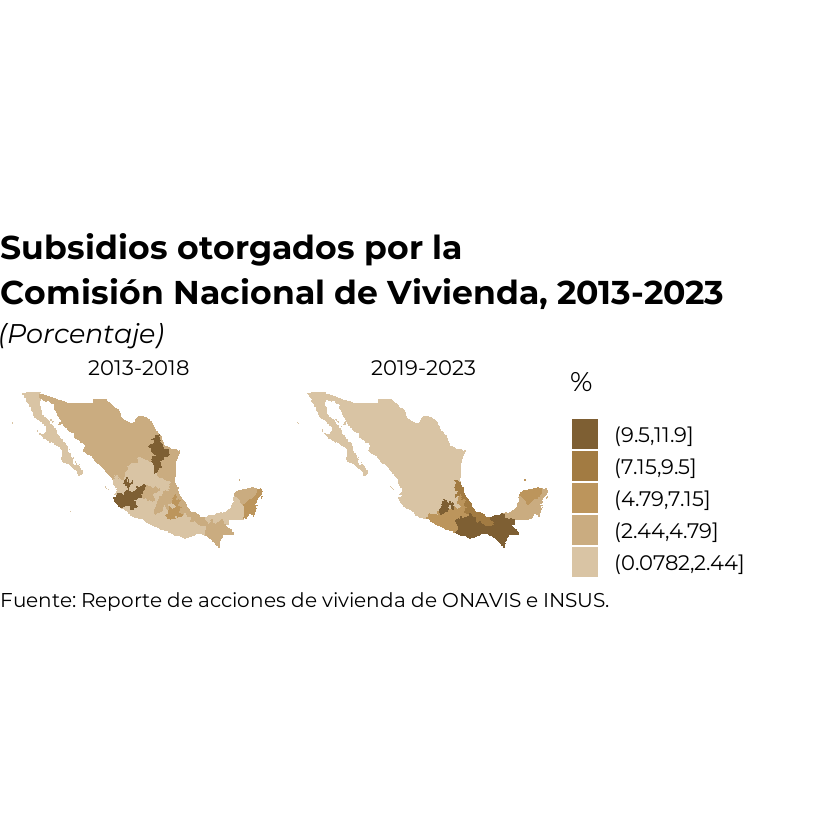

In [ ]:
ent%>%
  ggplot() +
  # Capa con datos de los municipios
  geom_sf(data=ent,aes(fill = acciones_cat),
          colour = "#1C00ff00", size = 0.07) +
  # Agrega título, subtítulo y fuente
  labs(title = "Subsidios otorgados por la
Comisión Nacional de Vivienda, 2013-2023",
       subtitle="(Porcentaje)",
       caption = "
Fuente: Reporte de acciones de vivienda de ONAVIS e INSUS.") +
  scale_fill_manual("%",values = custom_palette)+
  guides(fill = guide_legend(reverse = TRUE)) +
    theme_void()+
  theme(plot.title = element_text(hjust = 0, size=25,face="bold"),
        plot.subtitle = element_text(hjust = 0, size=20, face="italic"),
        plot.caption = element_text(hjust = 0,size=15),
        legend.position="right",
        #Fuente y tamaño
        text=element_text("pop",
                          size=20))+
    facet_wrap(~periodo)
print("Con un menor presupuesto, se han focalizado las acciones en los estados del Sur-Sureste; es decir, aquellos con mayor rezago habitacional en el país.")

In [ ]:
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2013,2023/0/0/anio,organismo,rango_edad"


In [ ]:
r <- GET(url, timeout(10000))
df <- fromJSON(rawToChar(r$content))%>%
  arrange(año)%>%
  #Filtrar por organismo
  filter(organismo=="CONAVI")%>%
mutate(periodo=case_when(año>=2013 & año<=2018~"2013-2018",año>=2019 & año<=2023~"2019-2023"))%>%
group_by(periodo,grupo_edad)%>%
summarise(acciones=sum(acciones),monto=sum(monto))%>%
ungroup()%>%
#Crear distribución porcentual
group_by(periodo)%>%
mutate(porcentaje=round(acciones/sum(acciones)*100,2))
df

`summarise()` has grouped output by 'periodo'. You can override using the
`.groups` argument.


periodo,grupo_edad,acciones,monto,porcentaje
<chr>,<chr>,<int>,<dbl>,<dbl>
2013-2018,29 o menos,368339,19364070164,38.09
2013-2018,30 a 59,572799,28401566160,59.23
2013-2018,60 o más,25905,891225847,2.68
2013-2018,No disponible,49,866844958,0.01
2019-2023,29 o menos,42172,3367473529,10.92
2019-2023,30 a 59,246216,19536016327,63.76
2019-2023,60 o más,97799,8540894332,25.32


[1] "Las acciones de CONAVI ya no solo toman en cuenta a la población en edad laboral, sino que se han enfocado acciones también en los grupos de edad más vulnerables."


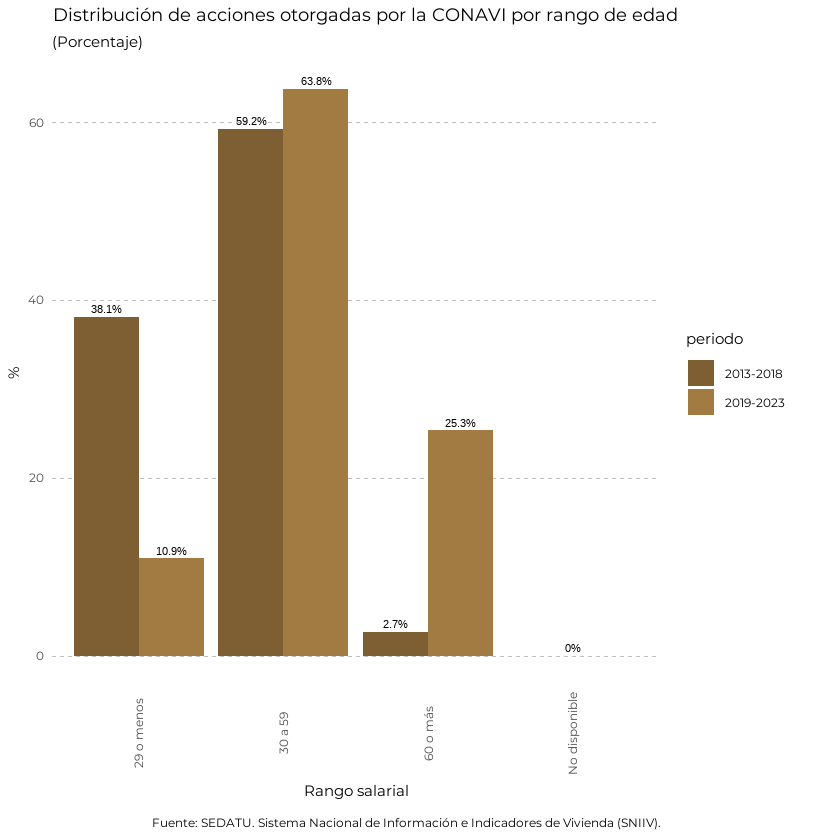

In [ ]:
print("Las acciones de CONAVI ya no solo toman en cuenta a la población en edad laboral, sino que se han enfocado acciones también en los grupos de edad más vulnerables.")

df%>%
  ggplot(aes(x=grupo_edad,y=porcentaje,fill=periodo))+
  geom_col(position="dodge")+
  geom_text(
    aes(label = paste0(round(porcentaje, 1), "%")),
    position = position_dodge(width = 0.9),
    vjust = -0.5,
    size = 3  # Adjust the size of the text
  ) +
  labs(title="Distribución de acciones otorgadas por la CONAVI por rango de edad",x = "Rango salarial", y = "%",
       subtitle="(Porcentaje)",
       caption = "
Fuente: SEDATU. Sistema Nacional de Información e Indicadores de Vivienda (SNIIV).")+
    scale_fill_manual(values=c("#7e5f33","#a27b42","#bc955c","#caac80","#d9c4a4"))+
    theme_minimal()+
    theme(
      text = element_text(family = "pop"),
      plot.title = element_text(hjust = 0),
      axis.title.x = element_text(vjust = -0.5),
      axis.title.y = element_text(vjust = 1),
      axis.text.x = element_text(angle = 90, vjust = 0.5),
      axis.text.y = element_text(hjust = 1),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
      panel.grid.minor.y = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      plot.background = element_blank()
    )

### Disminución del rezago habitacional en México

In [ ]:
#Ejectuar la petición
urlbasica="https://sniiv.sedatu.gob.mx/api/DemandaAPI/GetRezagoEstatal/"


years<-c("2008","2010","2012","2014","2016","2018","2020")



#Tabla en blanco para concatenar
rezago<-data.frame()

for (i in 1:length(years)){
  #Establecer el año
  year=years[i]
  #Establecer la petición
  peticion<-paste0(urlbasica,year)
  #Ejecutar la petición
  peticion<-GET(peticion)
  #Convertir a texto
  peticion<-content(peticion,as="text")
  #Convertir a json
  peticion<-fromJSON(peticion)
  #Convertir a data frame
  peticion<-as.data.frame(peticion)
  #Agregar el año
  peticion$year=year
  #Concatenar
  rezago<-bind_rows(rezago,peticion)
}

[1] "De 2018 a 2022 se redujo el porcentaje de viviendas en rezago habitacional en 3.3 puntos porcentuales"


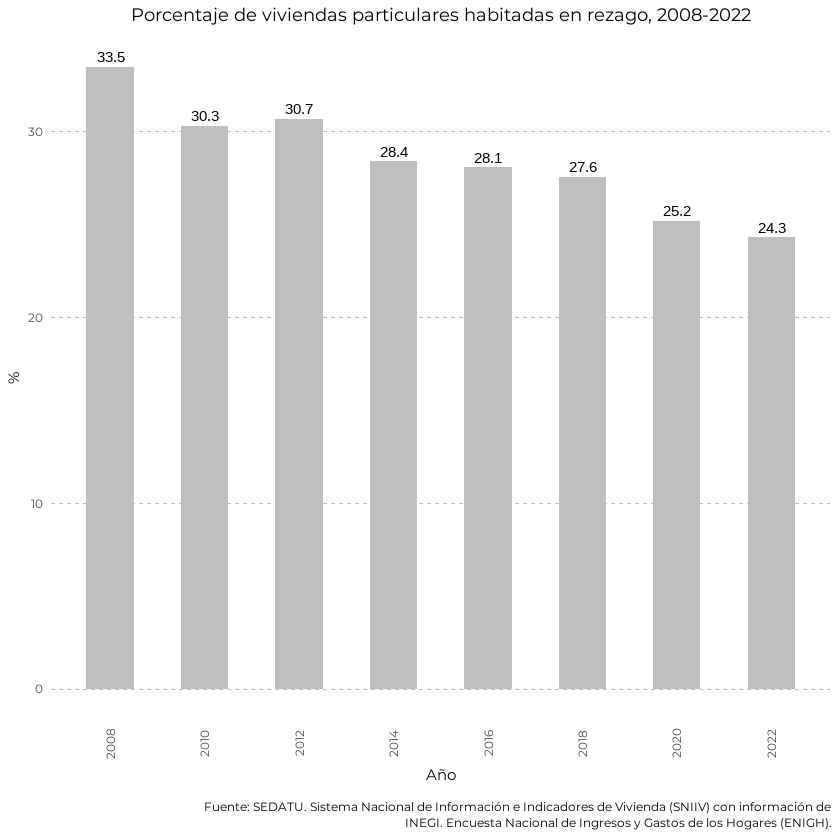

In [ ]:
print("De 2018 a 2022 se redujo el porcentaje de viviendas en rezago habitacional en 3.3 puntos porcentuales")
  rezago %>%
    # Add the data for year 2022
    bind_rows(tibble(year = "2022", con_rezago = NA, sin_rezago = NA, total = NA)) %>%
    group_by(year) %>%
    summarise(
      total = sum(total, na.rm = TRUE),
      con_rezago = sum(con_rezago, na.rm = TRUE),
      sin_rezago = sum(sin_rezago, na.rm = TRUE)
    ) %>%
    ungroup() %>%
    mutate(
      year = as.numeric(year),
      # Calcular porcentaje de rezago
      porc_rezago = ifelse(year == 2022, 24.3, round((con_rezago / total) * 100, 2))
    ) %>%
    arrange(year) %>%
    # Gráfica
    ggplot(aes(x = year, y = porc_rezago)) +
    geom_bar(stat = "identity", width = 1, fill = "GRAY") +
    geom_text(aes(label = round(porc_rezago, 1)), vjust = -0.5) +
    scale_x_continuous(breaks = seq(min(rezago$year), 2022, 2)) +
    labs(x = "Año", y = "%", title = "Porcentaje de viviendas particulares habitadas en rezago, 2008-2022",
caption = "
Fuente: SEDATU. Sistema Nacional de Información e Indicadores de Vivienda (SNIIV) con información de
INEGI. Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH)."

) +
    theme_minimal() +
    theme(
      text = element_text(family = "pop"),
      plot.title = element_text(hjust = 0.5),
      axis.title.x = element_text(vjust = -0.5),
      axis.title.y = element_text(vjust = 1),
      axis.text.x = element_text(angle = 90, vjust = 0.5),
      axis.text.y = element_text(hjust = 1),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
      panel.grid.minor.y = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      plot.background = element_blank(),
      legend.position = "none"
    )

### Incremento de la participación de la mujer en las acciones otorgadas por los ONAVIs


In [ ]:
#Ejectuar la petición
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2013,2023/0/0/anio,organismo,genero"

In [ ]:
r <- GET(url, timeout(10000))
df <- fromJSON(rawToChar(r$content))%>%
  arrange(año)%>%
  #Filtrar por organismo
mutate(periodo=case_when(año>=2013 & año<=2018~"2013-2018",
                        año>=2019 & año<=2023~"2019-2023"))%>%
filter(organismo=="INFONAVIT" | organismo=="FOVISSSTE" | organismo=="SHF (FONDEO)" | organismo=="CONAVI")%>%
group_by(periodo,sexo)%>%
summarise(acciones=sum(acciones),monto=sum(monto))%>%
ungroup()%>%
#Crear distribución porcentual
group_by(periodo)%>%
mutate(porcentaje=round(acciones/sum(acciones)*100,2))
df

`summarise()` has grouped output by 'periodo'. You can override using the
`.groups` argument.


periodo,sexo,acciones,monto,porcentaje
<chr>,<chr>,<int>,<dbl>,<dbl>
2013-2018,Hombre,3429305,633949534699,59.74
2013-2018,Mujer,2165907,387604816229,37.73
2013-2018,No disponible,144940,58693616694,2.53
2019-2023,Hombre,1778216,619951328033,55.92
2019-2023,Mujer,1385318,399418742311,43.56
2019-2023,No disponible,16628,22767266945,0.52


[1] "La participación de la mujer en la distribución de acciones de vivienda se incrementó 5.9 puntos porcentuales en el período 2019-2023 respecto al período 2013-2018."


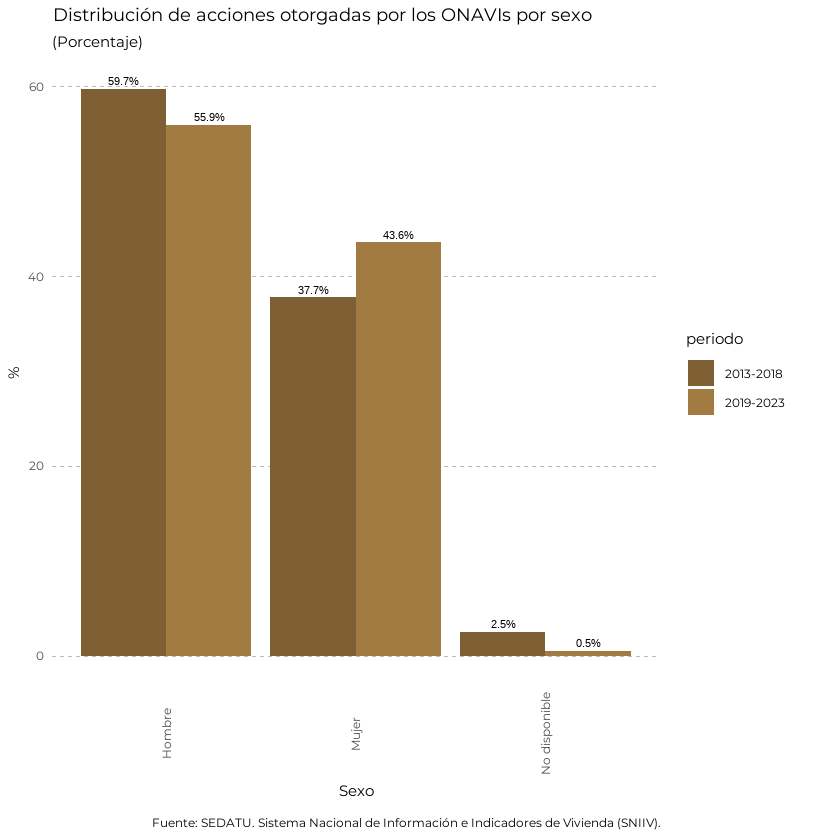

In [ ]:
print("La participación de la mujer en la distribución de acciones de vivienda se incrementó 5.9 puntos porcentuales en el período 2019-2023 respecto al período 2013-2018.")

df%>%
  ggplot(aes(x=sexo,y=porcentaje,fill=periodo))+
  geom_col(position="dodge")+
  geom_text(
    aes(label = paste0(round(porcentaje, 1), "%")),
    position = position_dodge(width = 0.9),
    vjust = -0.5,
    size = 3  # Adjust the size of the text
  ) +
  labs(title="Distribución de acciones otorgadas por los ONAVIs por sexo",x = "Sexo", y = "%",
       subtitle="(Porcentaje)",
       caption = "
Fuente: SEDATU. Sistema Nacional de Información e Indicadores de Vivienda (SNIIV).")+
    scale_fill_manual(values=c("#7e5f33","#a27b42","#bc955c","#caac80","#d9c4a4"))+
    theme_minimal()+
    theme(
      text = element_text(family = "pop"),
      plot.title = element_text(hjust = 0),
      axis.title.x = element_text(vjust = -0.5),
      axis.title.y = element_text(vjust = 1),
      axis.text.x = element_text(angle = 90, vjust = 0.5),
      axis.text.y = element_text(hjust = 1),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
      panel.grid.minor.y = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      plot.background = element_blank()
    )

### Acciones de INFONAVIT para autoproducción de vivienda


In [ ]:
#Ejectuar la petición
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetINFONAVIT/2013,2023/0/0/linea_credito,modalidad,esquema,mes,anio"

In [ ]:
r <- GET(url, timeout(10000))
df <- fromJSON(rawToChar(r$content))%>%
  arrange(año)%>%
  #Filtrar por organismo
mutate(periodo=case_when(año>=2013 & año<=2018~"2013-2018",
                        año>=2019 & año<=2023~"2019-2023"))%>%
filter(linea_credito=="Linea II" | linea_credito=="Linea III" | linea_credito=="Linea IV")%>%
filter(modalidad=="Adquisición de suelo" | modalidad=="Ampliación y rehabilitación" | modalidad=="Autoconstrucción" | modalidad=="Con disponibilidad de terreno")%>%
mutate(esquema=case_when(esquema=="Mejoravit infonavit" ~ "Mejoravit" ,
                           esquema=="INFONAVIT MejOraSí" ~ "MejOraSí" ,
                           esquema=="ConstruYo infonavit" ~ "ConstruYo" ,
                           esquema=="Tradicional" ~ "Tradicional" ,
                           TRUE~ "Otros") )%>%
group_by(periodo,esquema)%>%
summarise(acciones=sum(acciones),monto=sum(monto))%>%
ungroup()%>%
#Crear distribución porcentual
group_by(periodo)%>%
mutate(porcentaje=round(acciones/sum(acciones)*100,2))
df

`summarise()` has grouped output by 'periodo'. You can override using the
`.groups` argument.


periodo,esquema,acciones,monto,porcentaje
<chr>,<chr>,<int>,<dbl>,<dbl>
2013-2018,Mejoravit,388282,0,53.59
2013-2018,Otros,302424,2373227394,41.74
2013-2018,Tradicional,33837,6935986513,4.67
2019-2023,ConstruYo,1780,0,0.23
2019-2023,MejOraSí,16613,1082057129,2.16
2019-2023,Mejoravit,624529,0,81.19
2019-2023,Tradicional,126260,34813212757,16.41


[1] "El Mejoravit INFONAVIT incrementó 27.6 puntos porcentuales en su participación para acciones de autoproducción de vivienda en el período 2019-2023 respecto al período 2013-2018."
[1] "Además, para atender la autoproducción, el Instituto incorporó nuevos esquemas como MejOraSi y ConstruYO INFONAVIT."


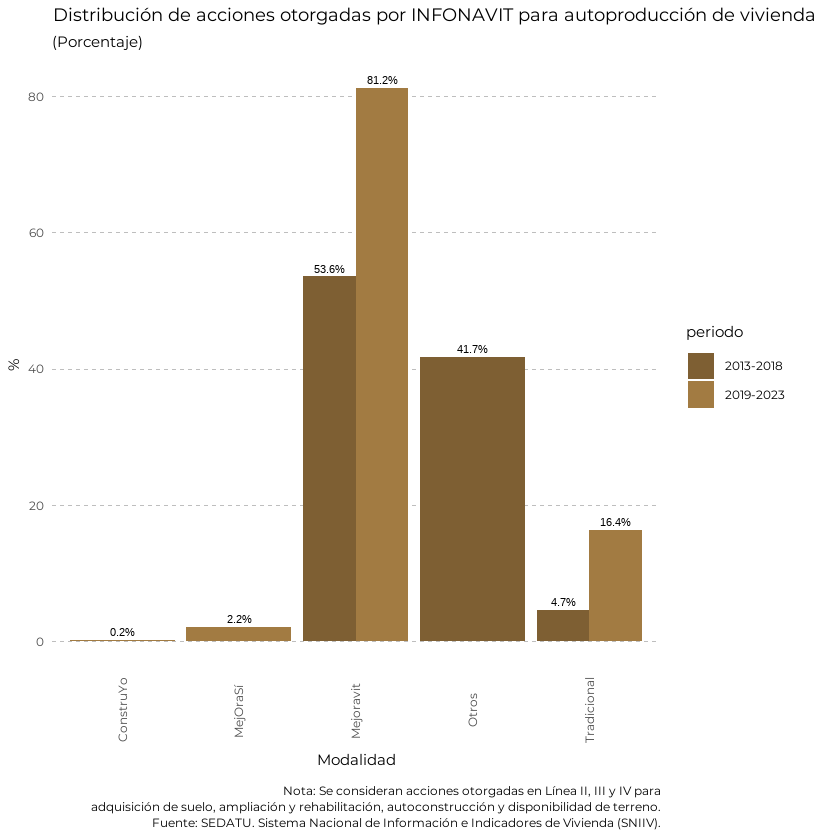

In [ ]:
print("El Mejoravit INFONAVIT incrementó 27.6 puntos porcentuales en su participación para acciones de autoproducción de vivienda en el período 2019-2023 respecto al período 2013-2018.")
print("Además, para atender la autoproducción, el Instituto incorporó nuevos esquemas como MejOraSi y ConstruYO INFONAVIT.")
df%>%
  ggplot(aes(x=esquema,y=porcentaje,fill=periodo))+
  geom_col(position="dodge")+
    geom_text(
        aes(label = paste0(round(porcentaje, 1), "%")),
        vjust = -0.5,
position = position_dodge(width = 0.9),
        size = 3  # Adjust the size of the text
    ) +
  labs(title="Distribución de acciones otorgadas por INFONAVIT para autoproducción de vivienda",x = "Modalidad", y = "%",
       subtitle="(Porcentaje)",
       caption = "
Nota: Se consideran acciones otorgadas en Línea II, III y IV para
adquisición de suelo, ampliación y rehabilitación, autoconstrucción y disponibilidad de terreno.
Fuente: SEDATU. Sistema Nacional de Información e Indicadores de Vivienda (SNIIV).")+
    scale_fill_manual(values=c("#7e5f33","#a27b42","#bc955c","#caac80","#d9c4a4"))+
    theme_minimal()+
     theme(
      text = element_text(family = "pop"),
      plot.title = element_text(hjust = 0),
      axis.title.x = element_text(vjust = -0.5),
      axis.title.y = element_text(vjust = 1),
      axis.text.x = element_text(angle = 90, vjust = 0.5),
      axis.text.y = element_text(hjust = 1),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
      panel.grid.minor.y = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      plot.background = element_blank()
    )

In [ ]:
url<-"https://sniiv.sedatu.gob.mx/api/CuboAPI/GetRegistro/2013,2023/0/0/anio,pcu"

In [ ]:
r <- GET(url, timeout(10000))
df <- fromJSON(rawToChar(r$content))%>%
  arrange(año)%>%
  #Filtrar por organismo
mutate(periodo=case_when(año>=2013 & año<=2018~"2013-2018",
                        año>=2019 & año<=2023~"2019-2023"))%>%
    group_by(periodo,pcu)%>%
    summarise(viviendas=sum(viviendas))%>%
    ungroup()%>%
    #Crear distribución porcentual
    group_by(periodo)%>%
    mutate(porcentaje=round(viviendas/sum(viviendas)*100,2))
df

`summarise()` has grouped output by 'periodo'. You can override using the
`.groups` argument.


periodo,pcu,viviendas,porcentaje
<chr>,<chr>,<int>,<dbl>
2013-2018,FC,329436,17.43
2013-2018,ND,305616,16.17
2013-2018,U1,139655,7.39
2013-2018,U2,313643,16.59
2013-2018,U3,801877,42.42
2019-2023,FC,154489,16.72
2019-2023,U1,93603,10.13
2019-2023,U2,173300,18.75
2019-2023,U3,502813,54.40


[1] "Las intenciones de construcción de vivienda nueva se ha incrementado en zonas con adecuada ubicación y dotada de servicios e infraestructura."


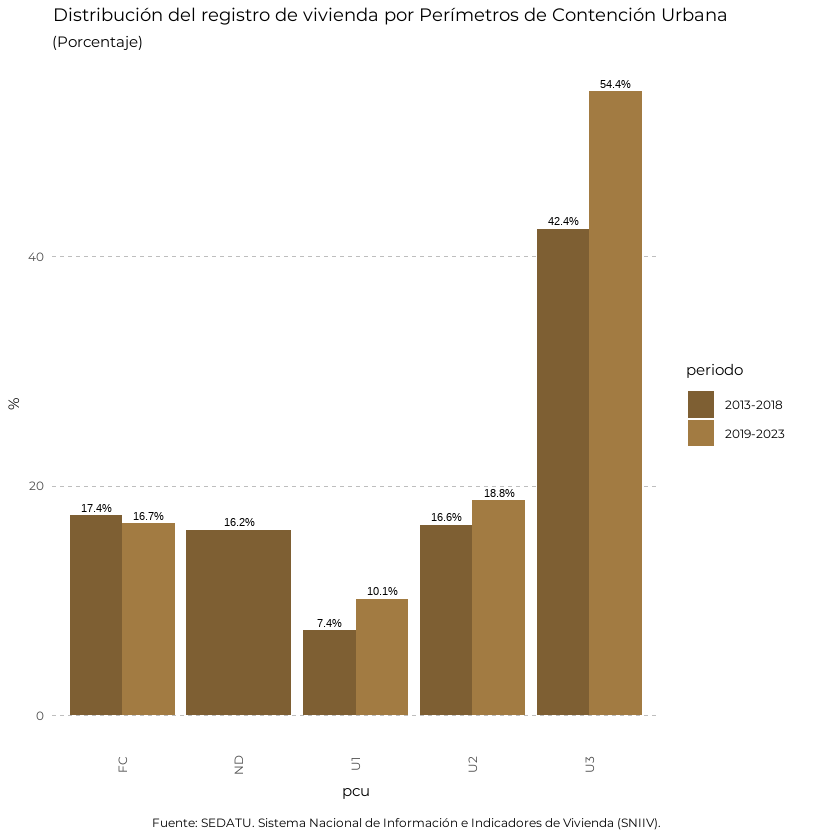

In [ ]:
print("Las intenciones de construcción de vivienda nueva se ha incrementado en zonas con adecuada ubicación y dotada de servicios e infraestructura.")
df%>%
  ggplot(aes(x=pcu,y=porcentaje,fill=periodo))+
  geom_col(position="dodge")+
  geom_text(
    aes(label = paste0(round(porcentaje, 1), "%")),
    position = position_dodge(width = 0.9),
    vjust = -0.5,
    size = 3  # Adjust the size of the text
  ) +
  labs(title="Distribución del registro de vivienda por Perímetros de Contención Urbana",x = "pcu", y = "%",
       subtitle="(Porcentaje)",
       caption = "
Fuente: SEDATU. Sistema Nacional de Información e Indicadores de Vivienda (SNIIV).")+
    scale_fill_manual(values=c("#7e5f33","#a27b42","#bc955c","#caac80","#d9c4a4"))+
    theme_minimal()+
    theme(
      text = element_text(family = "pop"),
      plot.title = element_text(hjust = 0),
      axis.title.x = element_text(vjust = -0.5),
      axis.title.y = element_text(vjust = 1),
      axis.text.x = element_text(angle = 90, vjust = 0.5),
      axis.text.y = element_text(hjust = 1),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
      panel.grid.minor.y = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      plot.background = element_blank()
    )